<a href="https://colab.research.google.com/github/wilberquito/melanoma.thesis/blob/main/Code/pytorch/notebooks/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [1]:
!pip install wandb torchinfo >/dev/null 2>&1

In [2]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 14.4 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [3]:
import requests
from pathlib import Path
import pandas as pd
import seaborn as sns
from zipfile import ZipFile

try:
    import google.colab
    from google.colab import drive
    IN_COLAB = True
    drive.mount('/content/drive')
except:
    IN_COLAB = False

print(f"In colab: {IN_COLAB}")

Mounted at /content/drive
In colab: True


In [4]:
def pull_code():
  print("Unzipping the code from google drive")
  !rm -rf modular/
  !unzip ./drive/MyDrive/wilberquito_thesis/modular.zip -d . >/dev/null 2>&1

if IN_COLAB:
    pull_code()

Unzipping the code from google drive


In [ ]:
def pull_data():
  answer = input("You sure? Y/n\n")
  if answer != "Y":
    return

  print("Unzipping the data from google drive")
  !rm -rf data.etl/
  !unzip ./drive/MyDrive/wilberquito_thesis/data.zip -d . >/dev/null 2>&1

if IN_COLAB:
    pull_data()

You sure? Y/n
Y
Unzipping the data from google drive


In [ ]:
import modular.dataset as m_dataset

data_dir = 'data.etl'
data_folder = '512'

df, _, mapping = m_dataset.get_df(data_dir, data_folder)

train_df, validate_df = m_dataset.train_validate_split(df,
                                                       random_state=42,
                                                       validate_size=0.2)

validate_df, test_df = m_dataset.train_validate_split(validate_df,
                                                      random_state=42,
                                                      validate_size=0.5)

In [ ]:
print(f'Samples mapping: {mapping}')

Samples mapping: {'AK': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'SCC': 4, 'VASC': 5, 'melanoma': 6, 'nevus': 7}


In [ ]:
print(f'Total samples: {df.shape[0]}')

Total samples: 31265


In [ ]:
diagnosis_freq = df['diagnosis'].value_counts()
diagnosis_freq

nevus       18031
melanoma     5090
BCC          3320
BKL          2837
AK            867
SCC           628
VASC          253
DF            239
Name: diagnosis, dtype: int64

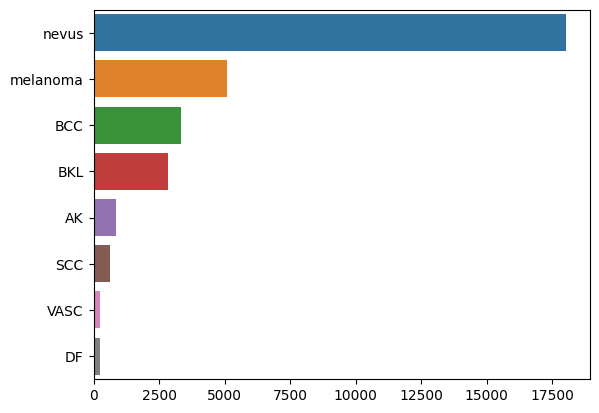

In [ ]:
diagnosis_freq = df['diagnosis'].value_counts()
diagnosis_freq
_ = sns.barplot(x=diagnosis_freq.values, y=diagnosis_freq.index)

In [ ]:
print(f'Train samples: {train_df.shape[0]}')

Train samples: 25012


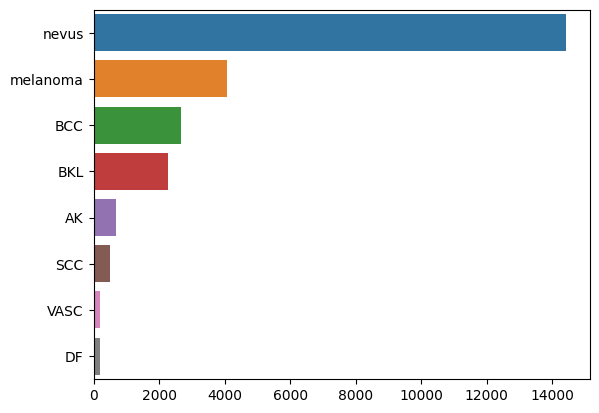

In [ ]:
diagnosis_freq = train_df['diagnosis'].value_counts()
diagnosis_freq
_ = sns.barplot(x=diagnosis_freq.values, y=diagnosis_freq.index)

In [ ]:
print(f'Validate samples: {validate_df.shape[0]}')

Validate samples: 3126


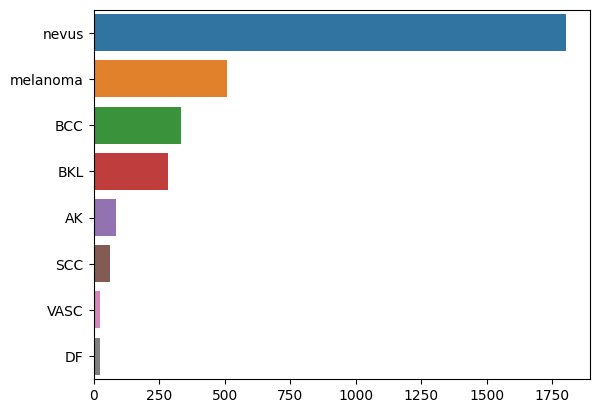

In [ ]:
diagnosis_freq = validate_df['diagnosis'].value_counts()
diagnosis_freq
_ = sns.barplot(x=diagnosis_freq.values, y=diagnosis_freq.index)

In [ ]:
print(f'Validate samples: {test_df.shape[0]}')

Validate samples: 3127


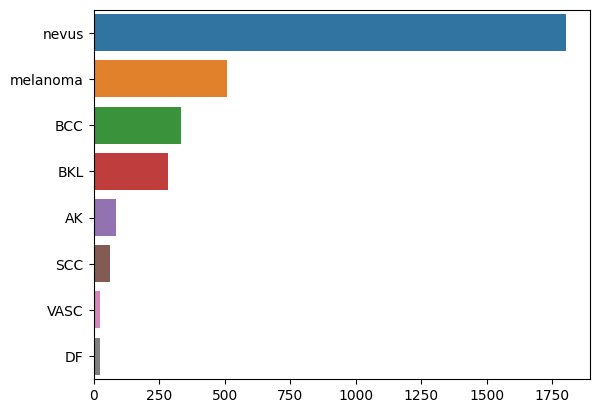

In [ ]:
diagnosis_freq = test_df['diagnosis'].value_counts()
diagnosis_freq
_ = sns.barplot(x=diagnosis_freq.values, y=diagnosis_freq.index)

## Data Analysis

In [ ]:
train_df.tail()

,Unnamed: 0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,filepath
23266,17273,ISIC_0060533,-1,male,75.0,anterior torso,BCC,benign,1,5,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0060...
14774,8781,ISIC_0030230,-1,female,55.0,posterior torso,BCC,benign,1,28,600,450,data.etl/jpeg-isic2019-512x512/train/ISIC_0030...
23065,17072,ISIC_0060217,-1,female,75.0,upper extremity,BKL,benign,2,19,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0060...
1803,1803,ISIC_3070142,IP_2482649,male,75.0,torso,nevus,benign,7,11,1872,1053,data.etl/jpeg-melanoma-512x512/train/ISIC_3070...
13419,7426,ISIC_0028872,-1,male,55.0,lower extremity,SCC,benign,4,4,600,450,data.etl/jpeg-isic2019-512x512/train/ISIC_0028...


In [ ]:
test_df.head()

,Unnamed: 0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,filepath
27064,21071,ISIC_0066630,-1,female,55.0,anterior torso,BCC,benign,1,19,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0066...
27952,21959,ISIC_0068025,-1,male,60.0,anterior torso,BCC,benign,1,15,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0068...
12974,6981,ISIC_0028423,-1,female,30.0,head/neck,nevus,benign,7,14,600,450,data.etl/jpeg-isic2019-512x512/train/ISIC_0028...
26129,20136,ISIC_0065148,-1,female,55.0,lower extremity,nevus,benign,7,13,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0065...
19946,13953,ISIC_0055245,-1,male,65.0,head/neck,BCC,benign,1,9,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0055...


In [ ]:
train_df.shape, test_df.shape

((25012, 13), (3127, 13))

In [ ]:
train_df.describe()

,Unnamed: 0,age_approx,target,tfrecord,width,height
count,25012.000000,24679.000000,25012.000000,25012.000000,25012.000000,25012.000000
mean,10813.916360,53.430042,5.445146,13.082920,1133.454262,892.067847
std,7601.878745,17.374231,2.351994,8.520051,748.163877,499.823432
min,0.000000,0.000000,0.000000,0.000000,576.000000,450.000000
25%,3945.000000,40.000000,4.000000,6.000000,600.000000,450.000000
50%,9733.000000,55.000000,7.000000,12.000000,1024.000000,1024.000000
75%,17435.250000,65.000000,7.000000,20.000000,1024.000000,1024.000000
max,25270.000000,90.000000,7.000000,29.000000,6000.000000,5184.000000


### Diagnosis and Melanoma

In [ ]:
grouped_df =  train_df.groupby(by=['diagnosis', 'benign_malignant'],
           as_index=False).count()

pivot_table = grouped_df.pivot(index='diagnosis', columns='benign_malignant', values='sex')
pivot_table = pivot_table.fillna(0)
pivot_table

benign_malignant,benign,malignant
diagnosis,,
AK,694.0,0.0
BCC,2656.0,0.0
BKL,2270.0,0.0
DF,191.0,0.0
SCC,502.0,0.0
VASC,202.0,0.0
melanoma,0.0,4072.0
nevus,14425.0,0.0


## Original Data vs Data Augmentation

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1765: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


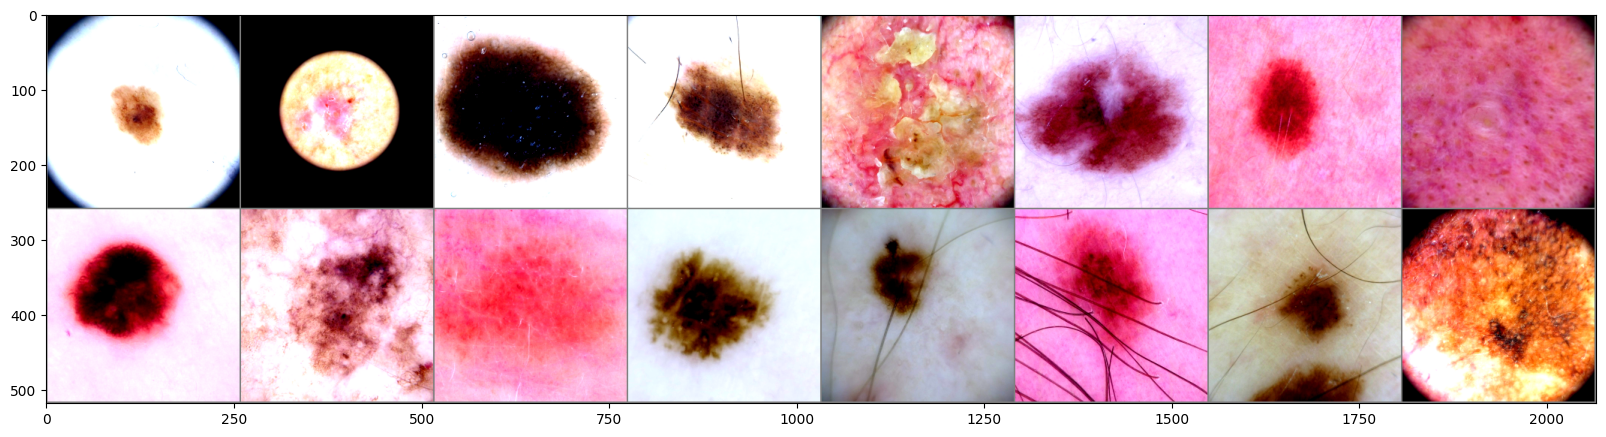

In [ ]:
import modular.utility as m_utility
from torch.utils.data import DataLoader

train_transforms, val_transforms = m_dataset.get_transforms(image_size=256)

# Compute the mapping class
idx_to_class = { i : classname for classname, i in mapping.items() }

# Create train and validate dataset
melanoma_dataset = m_dataset.MelanomaDataset(train_df,
                                             mode='train',
                                             transforms=val_transforms,
                                             idx_to_class=idx_to_class)
melanoma_dataloader = DataLoader(melanoma_dataset, batch_size=64, shuffle=False)
m_utility.display_random_images(melanoma_dataset, grid_size=16)

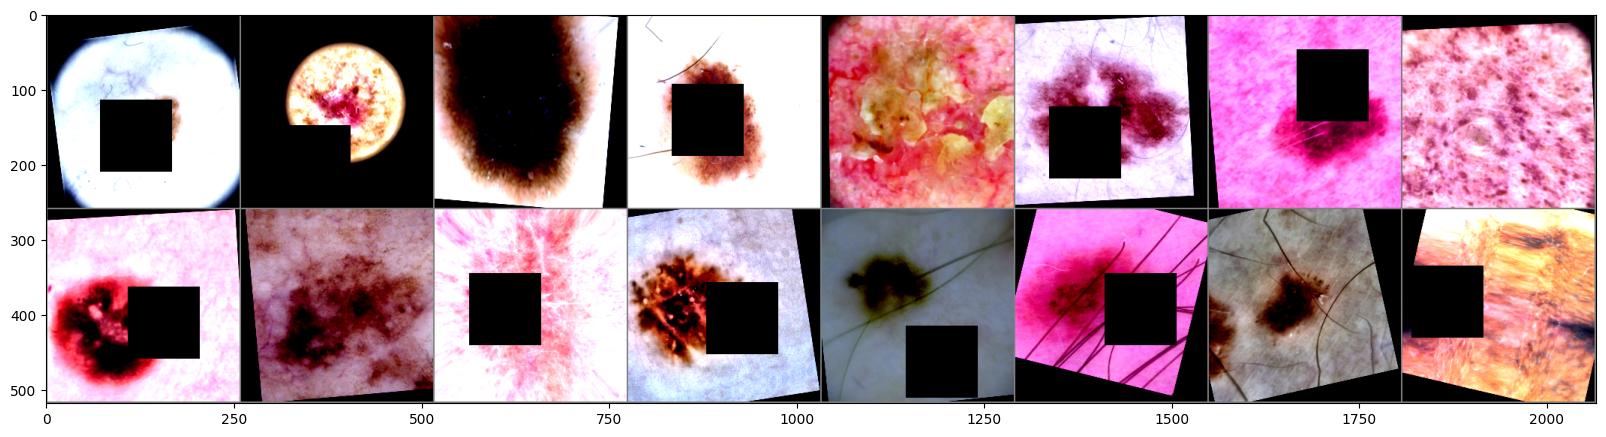

In [ ]:
import modular.utility as m_utility
from torch.utils.data import DataLoader

train_transforms, val_transforms = m_dataset.get_transforms(image_size=256)

# Compute the mapping class
idx_to_class = { i : classname for classname, i in mapping.items() }

# Create train and validate dataset
melanoma_dataset = m_dataset.MelanomaDataset(train_df,
                                             mode='train',
                                             transforms=train_transforms,
                                             idx_to_class=idx_to_class)
melanoma_dataloader = DataLoader(melanoma_dataset, batch_size=64, shuffle=False)
m_utility.display_random_images(melanoma_dataset, grid_size=16)

## Augmentations

In [ ]:
import albumentations as A
import numpy as np
import torch
import torchvision

In [ ]:
import modular.utility as m_utility
from torch.utils.data import DataLoader

train_transforms, val_transforms = m_dataset.get_transforms(image_size=256)

# Compute the mapping class
idx_to_class = { i : classname for classname, i in mapping.items() }

# Create train and validate dataset
melanoma_dataset = m_dataset.MelanomaDataset(train_df,
                                             mode='train',
                                             transforms=val_transforms,
                                             idx_to_class=idx_to_class)
melanoma_dataloader = DataLoader(melanoma_dataset, batch_size=64, shuffle=False)
images, labels = next(iter(melanoma_dataloader))

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1765: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


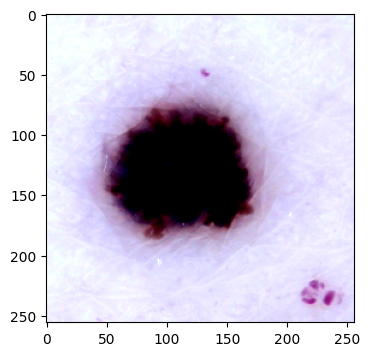

In [ ]:
orig_img = images[-5]
m_utility.show_img(orig_img, figsize=(5,4))

### Horizotal Flip

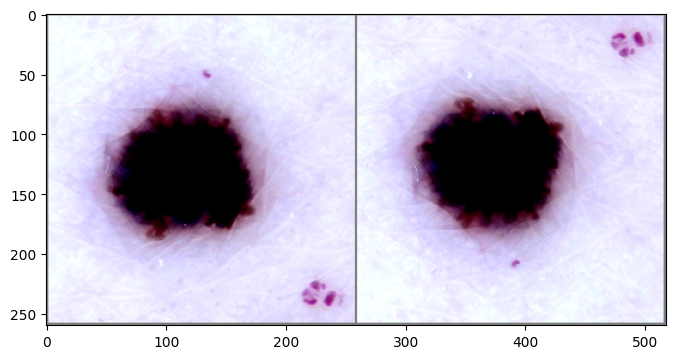

In [ ]:
img = np.transpose(orig_img.numpy(), (1, 2, 0))
aug = A.HorizontalFlip(p=1)
img = img.transpose(2, 0, 1)
img = torch.tensor(aug(image=img)['image']).float()
grid_images = torchvision.utils.make_grid(torch.stack([orig_img, img]))
m_utility.show_img(grid_images, figsize=(8,6))

### Gaussian Blur

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1765: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


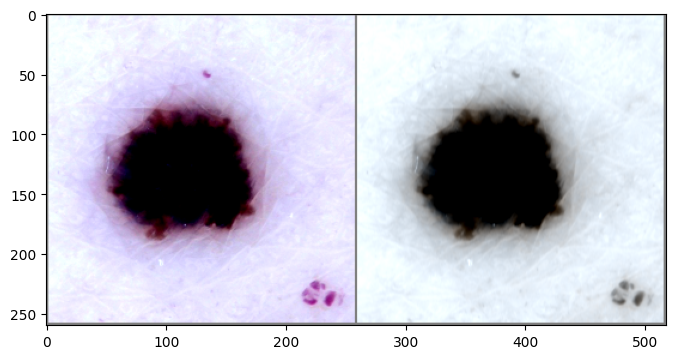

In [ ]:
img = np.transpose(orig_img.numpy(), (1, 2, 0))
aug = A.GaussianBlur(p=1, blur_limit=5)
img = img.transpose(2, 0, 1)
img = torch.tensor(aug(image=img)['image']).float()
grid_images = torchvision.utils.make_grid(torch.stack([orig_img, img]))
m_utility.show_img(grid_images, figsize=(8,6))

### RandomBrightnessContrast

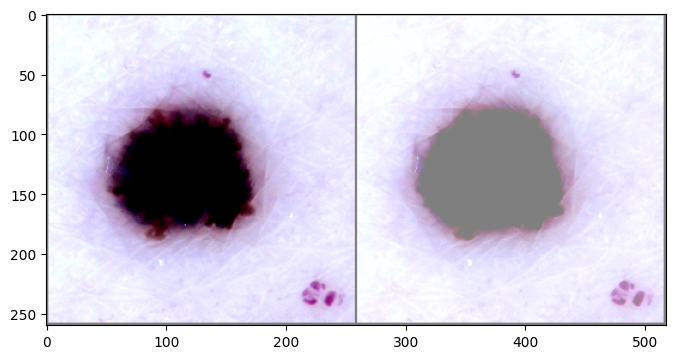

In [ ]:
img = np.transpose(orig_img.numpy(), (1, 2, 0))
aug =  A.RandomBrightnessContrast(contrast_limit=0.2, p=0.75)
img = img.transpose(2, 0, 1)
img = torch.tensor(aug(image=img)['image']).float()
grid_images = torchvision.utils.make_grid(torch.stack([orig_img, img]))
m_utility.show_img(grid_images, figsize=(8,6))